In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data.csv


## Import Dataset

In [2]:
df=pd.read_csv('/kaggle/input/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
column_list=df.columns
print(column_list)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [4]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

## Observations
1. id cannot be used for classificaiton 
2. Diagnosis is class label
3. Unnamed: 32 feature includes NaN so we do not need that

## Declare the dependent (y) and independent (X) parameters

In [5]:
to_drop=['Unnamed: 32','id','diagnosis']
X=df.drop(to_drop,axis=1)
y=df['diagnosis']

## Encode the dependent (y) parameter

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

## Standardize the data

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Filter Methods

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

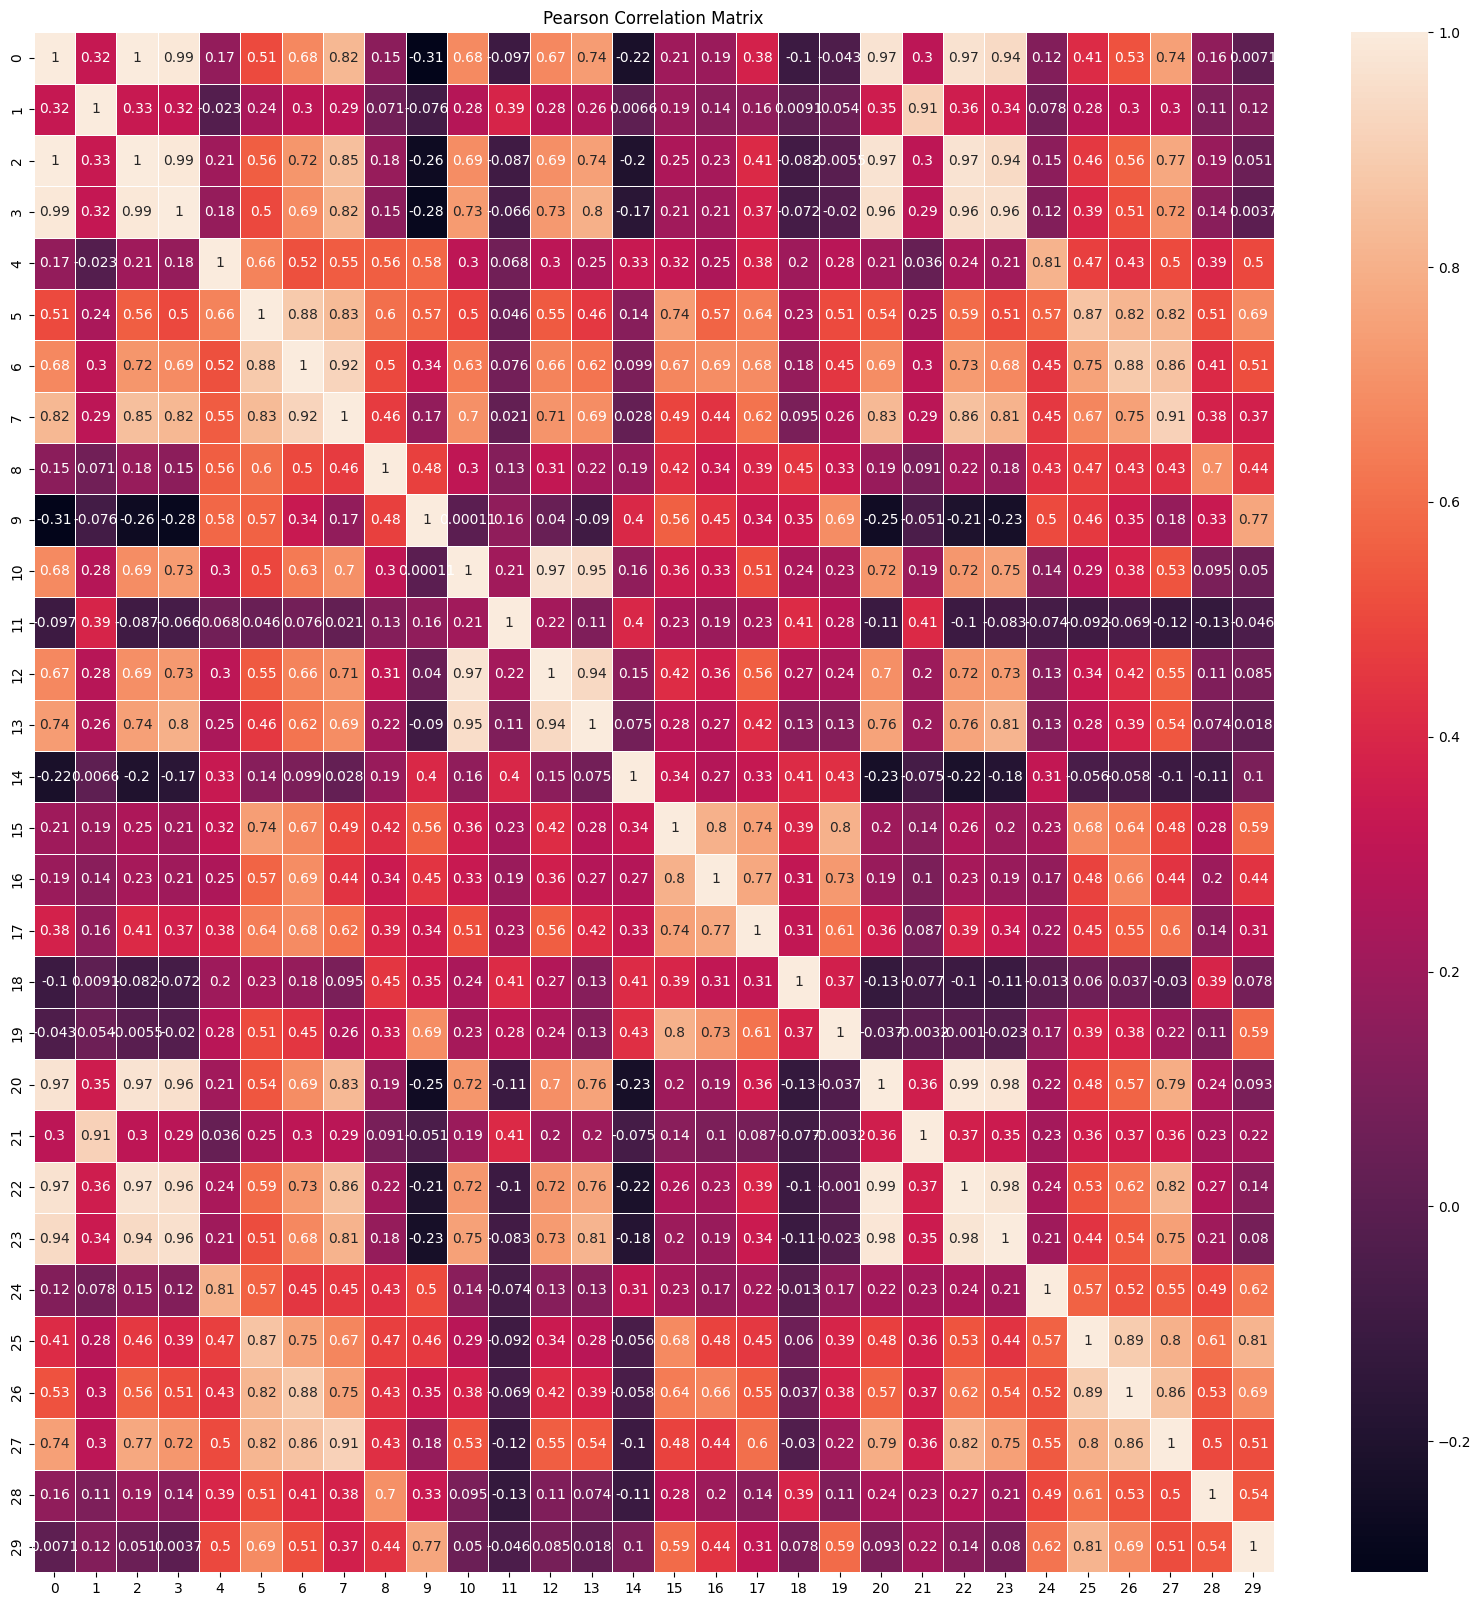

In [9]:
# 1. Pearson Correlation
corr = pd.DataFrame(X_scaled).corr(method='pearson')
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, linewidths=.5)
plt.title('Pearson Correlation Matrix')
plt.show()

In [10]:
# 2. Chi-square Test 
X_scaled_pos = np.abs(X_scaled)  # Making data positive for Chi-square
chi2_selector = SelectKBest(chi2, k=10)
X_selected_chi2 = chi2_selector.fit_transform(X_scaled_pos, y)


In [11]:
# 3. Information Gain (Mutual Information)
mi_selector = SelectKBest(mutual_info_classif, k=10)
X_selected_mi = mi_selector.fit_transform(X_scaled, y)

# Wrapper Methods


In [12]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression

In [13]:
# 1. Forward Selection
sfs_forward = SFS(LogisticRegression(), k_features=10, forward=True, floating=False, cv=5)
sfs_forward = sfs_forward.fit(X_scaled, y)
selected_features_forward = sfs_forward.k_feature_idx_
X_selected_forward = X_scaled[:, selected_features_forward]


In [14]:
# 2. Backward Elimination
sfs_backward = SFS(LogisticRegression(), k_features=10, forward=False, floating=False, cv=5)
sfs_backward = sfs_backward.fit(X_scaled, y)
selected_features_backward = sfs_backward.k_feature_idx_
X_selected_backward = X_scaled[:, selected_features_backward]


In [15]:
# 3. Stepwise Selection
sfs_stepwise = SFS(LogisticRegression(), k_features=10, forward=True, floating=True, cv=5)
sfs_stepwise = sfs_stepwise.fit(X_scaled, y)
selected_features_stepwise = sfs_stepwise.k_feature_idx_
X_selected_stepwise = X_scaled[:, selected_features_stepwise]


# Embedded Methods


In [16]:
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV

In [17]:
# 1. LASSO
lasso = LassoCV(cv=5, max_iter=10000).fit(X_scaled, y)
X_selected_lasso = X_scaled[:, np.where(lasso.coef_ != 0)[0]]

# 2. Ridge
ridge = RidgeCV(cv=5).fit(X_scaled, y)
X_selected_ridge = X_scaled 

# 3. Elastic Net
elastic_net = ElasticNetCV(cv=5, max_iter=10000).fit(X_scaled, y)
X_selected_elastic_net = X_scaled[:, np.where(elastic_net.coef_ != 0)[0]]

# Training and Evaluation using these selected features


In [18]:
from sklearn.metrics import accuracy_score, roc_curve, auc


In [19]:
def train_evaluate(X, y, method_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    
    print(f"{method_name} - Accuracy: {accuracy:.4f}, AUC: {roc_auc:.4f}")
    
    return fpr, tpr, roc_auc

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


# Evaluate All Methods


Chi-square - Accuracy: 0.8538, AUC: 0.9326
Mutual Information - Accuracy: 0.9649, AUC: 0.9947
Forward Selection - Accuracy: 0.9825, AUC: 0.9983
Backward Elimination - Accuracy: 0.9766, AUC: 0.9970
Stepwise Selection - Accuracy: 0.9649, AUC: 0.9954
LASSO - Accuracy: 0.9649, AUC: 0.9954
Ridge - Accuracy: 0.9708, AUC: 0.9969
Elastic Net - Accuracy: 0.9708, AUC: 0.9953


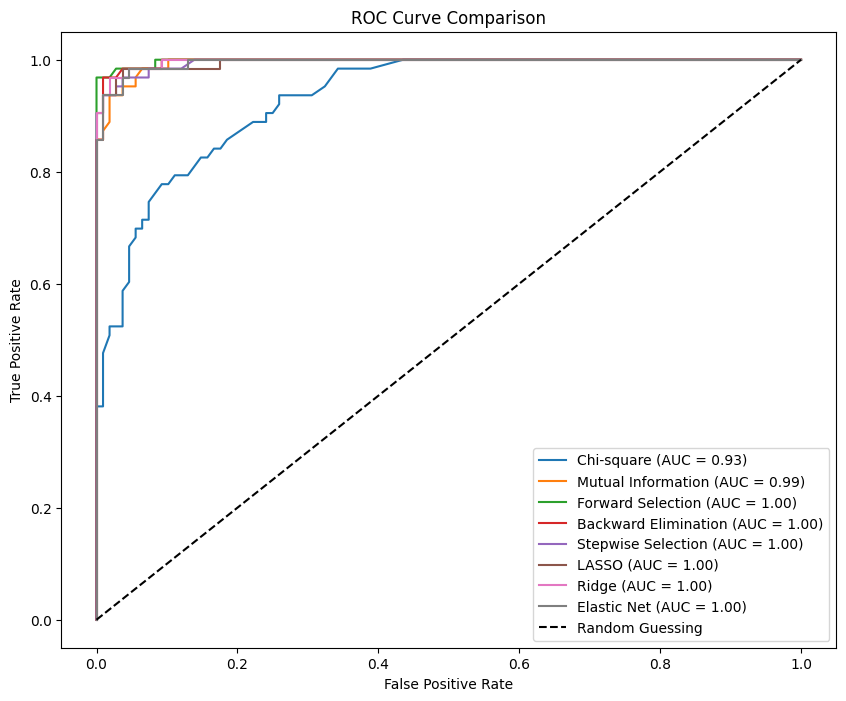

In [21]:
methods = {
    'Chi-square': X_selected_chi2,
    'Mutual Information': X_selected_mi,
    'Forward Selection': X_selected_forward,
    'Backward Elimination': X_selected_backward,
    'Stepwise Selection': X_selected_stepwise,
    'LASSO': X_selected_lasso,
    'Ridge': X_selected_ridge,
    'Elastic Net': X_selected_elastic_net
}

# Plot ROC Curves
plt.figure(figsize=(10, 8))

for name, X_selected in methods.items():
    fpr, tpr, roc_auc = train_evaluate(X_selected, y, name)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()